In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
import urllib.parse
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load environment variables from .env
load_dotenv()
# Get PostgreSQL credentials from environment variables
username = os.getenv("POSTGRES_USERNAME")
password = os.getenv("POSTGRES_PASSWORD")
host = os.getenv("POSTGRES_HOST")
database_name = os.getenv("POSTGRES_DATABASE")
# Encode the password if needed
encoded_password = urllib.parse.quote(password)
# Create the database URL
database_url = f"postgresql://{username}:{encoded_password}@{host}/{database_name}"
# Create the engine using the database URL
engine = create_engine(database_url)

In [3]:
# Define the SQL query to retrieve the data from the database
query = "SELECT * FROM xdr_data"

# Load the data into a pandas DataFrame
df = pd.read_sql(query, engine)

# Example of EDA
df.head(10) # Display the first few rows of the DataFrame

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
8,1.311448e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,18436641.0,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0
9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


In [39]:
# Display the Shape of our Data
df.shape

(150001, 55)

In [4]:
# Describe the data using one column
df["MSISDN/Number"].describe()

count    1.489350e+05
mean     4.188282e+10
std      2.447443e+12
min      3.360100e+10
25%      3.365130e+10
50%      3.366371e+10
75%      3.368349e+10
max      8.823971e+14
Name: MSISDN/Number, dtype: float64

In [5]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

In [6]:
# percent missing of total data
percent_missing(df)

The dataset contains 12.5 % missing values.


/tmp/ipykernel_7971/405722216.py:2: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  percent_missing(df)


In [7]:
# Now which column(s) has missing values
df.isna().sum()


Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

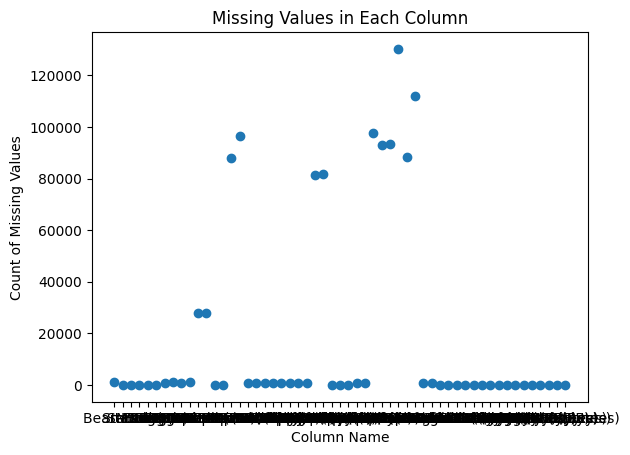

In [8]:
# Calculate the count of missing values for each column
missing_counts = df.isna().sum()

# Create a scatter plot
plt.scatter(missing_counts.index, missing_counts.values)
plt.xlabel('Column Name')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values in Each Column')
plt.show()

In [9]:
# 1. drop columns with more than 30% missing values
df_clean = df.drop(["Nb of sec with 6250B < Vol UL < 37500B", "Nb of sec with 6250B < Vol DL < 31250B", "Nb of sec with 37500B < Vol UL", "Nb of sec with 31250B < Vol DL < 125000B", "Nb of sec with 1250B < Vol UL < 6250B", "Nb of sec with 125000B < Vol DL", "HTTP DL (Bytes)", "HTTP UL (Bytes)"], axis=1)
df_clean.shape

(150001, 47)

In [47]:
# Sum of Values with Null
df_clean.isna().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
TCP DL Retrans. Vol (Bytes)       88146
TCP UL Retrans. Vol (Bytes)       96649
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1


In [10]:
# fill missing with ffill method for columns
df_clean['TCP DL Retrans. Vol (Bytes)'].fillna(method='ffill', inplace=True)
df_clean['TCP UL Retrans. Vol (Bytes)'].fillna(method='bfill', inplace=True)
df_clean['Avg RTT UL (ms)'].fillna(method='ffill', inplace=True)
df_clean['Avg RTT DL (ms)'].fillna(method='bfill', inplace=True)


/tmp/ipykernel_7971/134694278.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['TCP DL Retrans. Vol (Bytes)'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_7971/134694278.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean['TCP DL Retrans. Vol (Bytes)'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_7971/134694278.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through cha

In [11]:
# Sum of Values with Null
df_clean.isna().sum()

Bearer Id                          991
Start                                1
Start ms                             1
End                                  1
End ms                               1
Dur. (ms)                            1
IMSI                               570
MSISDN/Number                     1066
IMEI                               572
Last Location Name                1153
Avg RTT DL (ms)                      1
Avg RTT UL (ms)                      0
Avg Bearer TP DL (kbps)              1
Avg Bearer TP UL (kbps)              1
TCP DL Retrans. Vol (Bytes)          7
TCP UL Retrans. Vol (Bytes)          5
DL TP < 50 Kbps (%)                754
50 Kbps < DL TP < 250 Kbps (%)     754
250 Kbps < DL TP < 1 Mbps (%)      754
DL TP > 1 Mbps (%)                 754
UL TP < 10 Kbps (%)                792
10 Kbps < UL TP < 50 Kbps (%)      792
50 Kbps < UL TP < 300 Kbps (%)     792
UL TP > 300 Kbps (%)               792
Activity Duration DL (ms)            1
Activity Duration UL (ms)

In [12]:
# Display the Missing Percent in our Data
percent_missing(df_clean)

The dataset contains 0.19 % missing values.


/tmp/ipykernel_7971/2605831240.py:2: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  percent_missing(df_clean)


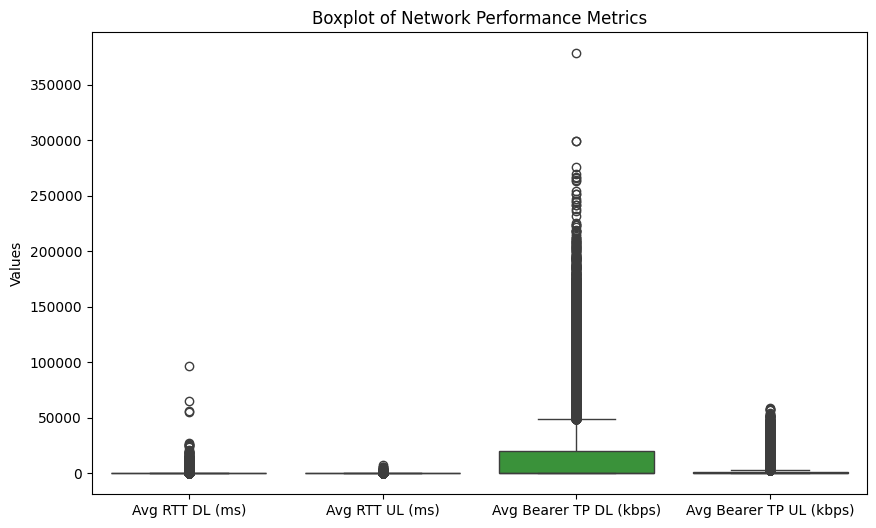

In [13]:
# Assuming df_clean is your DataFrame
columns_of_interest = ["Avg RTT DL (ms)", "Avg RTT UL (ms)", "Avg Bearer TP DL (kbps)", "Avg Bearer TP UL (kbps)"]
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean[columns_of_interest])
plt.title('Boxplot of Network Performance Metrics')
plt.ylabel('Values')
plt.show()


In [14]:
# Assuming df_clean is your DataFrame
columns_of_interest = ["Avg RTT DL (ms)", "Avg RTT UL (ms)", "Avg Bearer TP DL (kbps)", "Avg Bearer TP UL (kbps)"]

# Calculate Z-scores
z_scores = stats.zscore(df_clean[columns_of_interest])

# Set a threshold for outlier detection
threshold = 3

# Identify outliers
outliers = (z_scores > threshold).any(axis=1)

# Display the rows with outliers
outlier_rows = df_clean[outliers]
print(outlier_rows)


           Bearer Id            Start  Start ms              End  End ms  \
58      7.277826e+18  4/20/2019 14:08     136.0   4/25/2019 0:54    79.0   
72      7.277826e+18  4/21/2019 13:57     724.0   4/25/2019 0:54    79.0   
184     7.349883e+18   4/23/2019 5:23     145.0   4/25/2019 0:01   486.0   
472     6.917538e+18  4/23/2019 23:08     198.0  4/24/2019 23:08    51.0   
595     7.277826e+18   4/24/2019 0:03     240.0   4/25/2019 0:02   503.0   
...              ...              ...       ...              ...     ...   
149693  7.277826e+18   4/29/2019 7:25     179.0   4/30/2019 7:25    29.0   
149856  7.277826e+18   4/29/2019 7:27     430.0   4/30/2019 4:25   971.0   
149857  1.311448e+19   4/29/2019 7:27     560.0  4/30/2019 11:31   964.0   
149955  7.349883e+18   4/29/2019 7:28     178.0   4/30/2019 9:49   555.0   
149956  7.349883e+18   4/29/2019 7:28     849.0  4/30/2019 13:52   906.0   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
58       384341.0  2.08

In [15]:
# Calculate the percentage of null values in each column
null_percentage = df_clean.isnull().mean() * 100

# Display the null percentage for each column
null_percentage

Bearer Id                         0.660662
Start                             0.000667
Start ms                          0.000667
End                               0.000667
End ms                            0.000667
Dur. (ms)                         0.000667
IMSI                              0.379997
MSISDN/Number                     0.710662
IMEI                              0.381331
Last Location Name                0.768662
Avg RTT DL (ms)                   0.000667
Avg RTT UL (ms)                   0.000000
Avg Bearer TP DL (kbps)           0.000667
Avg Bearer TP UL (kbps)           0.000667
TCP DL Retrans. Vol (Bytes)       0.004667
TCP UL Retrans. Vol (Bytes)       0.003333
DL TP < 50 Kbps (%)               0.502663
50 Kbps < DL TP < 250 Kbps (%)    0.502663
250 Kbps < DL TP < 1 Mbps (%)     0.502663
DL TP > 1 Mbps (%)                0.502663
UL TP < 10 Kbps (%)               0.527996
10 Kbps < UL TP < 50 Kbps (%)     0.527996
50 Kbps < UL TP < 300 Kbps (%)    0.527996
UL TP > 300

In [17]:
# Display the Shape of Our Data
df_clean.shape

(150001, 47)

In [18]:
# Drop rows with any missing values
df_clean.dropna(inplace=True)
df_clean.shape


(146880, 47)

In [19]:
# Exclude non-numeric columns from the DataFrame
numeric_columns = df_clean.select_dtypes(include=['number'])
# Calculate the standard deviation for each numeric column
std_deviation_per_column = numeric_columns.std()
std_deviation_per_column



Bearer Id                         2.892809e+18
Start ms                          2.885597e+02
End ms                            2.880749e+02
Dur. (ms)                         8.049000e+04
IMSI                              1.334754e+09
MSISDN/Number                     8.792355e+11
IMEI                              2.238851e+13
Avg RTT DL (ms)                   5.535062e+02
Avg RTT UL (ms)                   8.470492e+01
Avg Bearer TP DL (kbps)           2.408217e+04
Avg Bearer TP UL (kbps)           4.650710e+03
TCP DL Retrans. Vol (Bytes)       1.652241e+08
TCP UL Retrans. Vol (Bytes)       2.220814e+07
DL TP < 50 Kbps (%)               1.305455e+01
50 Kbps < DL TP < 250 Kbps (%)    6.212860e+00
250 Kbps < DL TP < 1 Mbps (%)     4.161585e+00
DL TP > 1 Mbps (%)                4.838817e+00
UL TP < 10 Kbps (%)               4.643201e+00
10 Kbps < UL TP < 50 Kbps (%)     3.230792e+00
50 Kbps < UL TP < 300 Kbps (%)    1.613163e+00
UL TP > 300 Kbps (%)              1.304094e+00
Activity Dura

In [21]:
# Dispaly the Shape of the Data
df_clean.shape

(146880, 47)

In [22]:
# Copy our data frame
df_clean_copy=df_clean.copy()
df_clean_copy.shape

(146880, 47)

In [64]:
#Here is how I handle the outliers, 
def fix_outliers(df_clean_copy: pd.DataFrame):
     
            #Replace Outlier values
            for col in df_clean_copy.select_dtypes('float64').columns.tolist():
                Q1 = df_clean_copy[col].quantile(0.25)
                Q3 = df_clean_copy[col].quantile(0.75)
                IQR = Q3 - Q1
                lower = Q1 - (IQR * 1.5)
                upper = Q3 + (IQR * 1.5)
                df_clean_copy[col] = np.where(df_clean_copy[col] > upper, upper, df_clean_copy[col])
                df_clean_copy[col] = np.where(df_clean_copy[col] < lower, lower, df_clean_copy[col])
                # logger.info('Fix outliers')
      
            return df_clean_copy


In [65]:
df_final=fix_outliers(df_clean_copy)
df_final.shape

(146880, 47)

In [31]:
print(df_clean.columns)

Index(['Category', 'Percentage'], dtype='object')


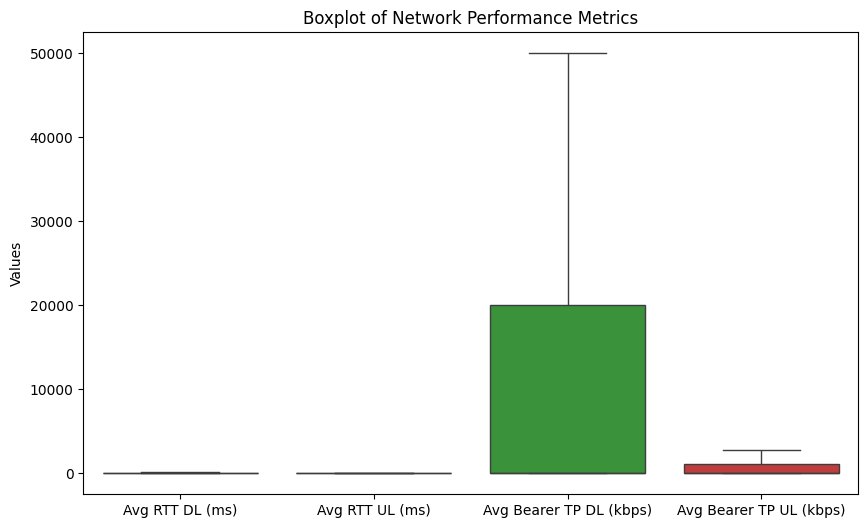

In [66]:
# Assuming df_clean is your DataFrame
columns_of_interest = ["Avg RTT DL (ms)", "Avg RTT UL (ms)", "Avg Bearer TP DL (kbps)", "Avg Bearer TP UL (kbps)"]
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final[columns_of_interest])
plt.title('Boxplot of Network Performance Metrics')
plt.ylabel('Values')
plt.show()

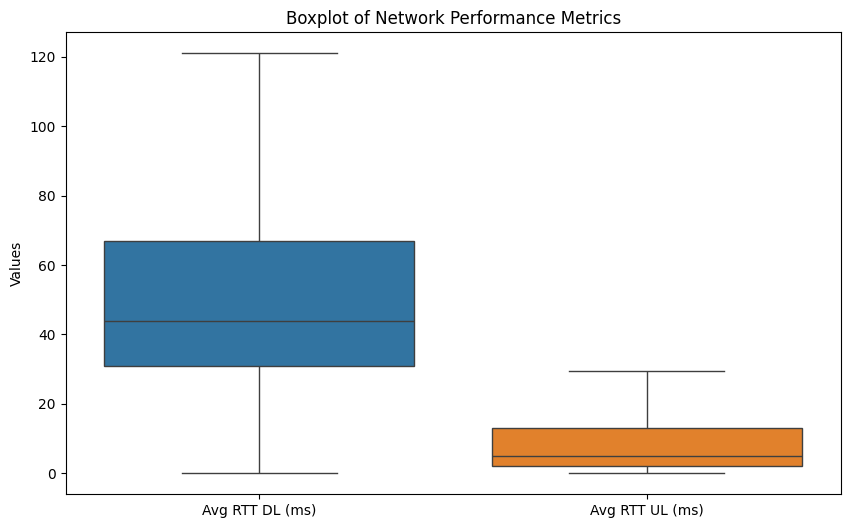

In [68]:
# Assuming df_clean is your DataFrame
columns_of_interest = ["Avg RTT DL (ms)", "Avg RTT UL (ms)"]
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final[columns_of_interest])
plt.title('Boxplot of Network Performance Metrics')
plt.ylabel('Values')
plt.show()

In [69]:
# Assuming df_clean is your final cleaned DataFrame
# Replace 'df_clean' with the actual name of your DataFrame

# Specify the file path and name for the CSV file
file_path = '../data/cleaned_data.csv'

# Save the DataFrame to a CSV file
df_final.to_csv(file_path, index=False)
